In [2]:
import numpy as np
import matplotlib.pyplot as plt

from hfnet.datasets.colmap import Colmap
from hfnet.evaluation.loaders import sift_loader, export_loader, fast_loader, harris_loader
from hfnet.evaluation.local_descriptors import evaluate
from hfnet.utils import tools

%load_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
config = {
    'sequences': ['british_museum', 'london_bridge', 'milan_cathedral','mount_rushmore', 
                  'piazza_san_marco', 'reichstag', 'st_pauls_cathedral',
#                 'florence_cathedral_side', 'lincoln_memorial_statue', 
#                 'united_states_capitol', 'sagrada_familia',
    ],
    'make_pairs': True, 'shuffle': True, 'pair_thresh': 0.4, 'max_num_pairs': 50
}
dataset = Colmap(**config)

[12/05/2018 01:06:30 INFO] Colmap sequence british_museum contains 50 pairs
[12/05/2018 01:06:41 INFO] Colmap sequence london_bridge contains 50 pairs
[12/05/2018 01:06:44 INFO] Colmap sequence milan_cathedral contains 50 pairs
[12/05/2018 01:06:46 INFO] Colmap sequence mount_rushmore contains 50 pairs
[12/05/2018 01:06:51 INFO] Colmap sequence piazza_san_marco contains 50 pairs
[12/05/2018 01:06:52 INFO] Colmap sequence reichstag contains 50 pairs
[12/05/2018 01:07:05 INFO] Colmap sequence st_pauls_cathedral contains 50 pairs


In [7]:
all_configs = {
    'sift': {
        'predictor': sift_loader,
        'root': True,
    },
    'superpoint': {
        'experiment': 'super_point_pytorch/colmap',
        'predictor': export_loader,
        'do_nms': True,
        'nms_thresh': 4,
        'remove_borders': 4,
        'binarize': False,
    },
    'superpoint_harris-kpts': {
        'experiment': 'super_point_pytorch/colmap',
        'predictor': export_loader,
        'keypoint_predictor': harris_loader,
        'keypoint_config': {
                'do_nms': True,
                'nms_thresh': 4,
        },
        'binarize': False,
    },
    'doap': {
        'experiment': 'doap/colmap_hpatches_ST-dense',
        'predictor': export_loader,
        'keypoint_predictor': export_loader,
        'keypoint_config': {
            'experiment': 'super_point_pytorch/colmap',
            'do_nms': True,
            'nms_thresh': 4,
            'remove_borders': 4,
        },
        'binarize': False,
    },  
    'netvlad_conv3-3': {
        'experiment': 'netvlad/colmap',
        'predictor': export_loader,
        'keypoint_predictor': export_loader,
        'keypoint_config': {
            'experiment': 'super_point_pytorch/colmap',
            'do_nms': True,
            'nms_thresh': 4,
            'remove_borders': 4,
        },
        'binarize': False,
    },
    'lfnet': {
        'experiment': 'lfnet/colmap_all_kpts-1000',
        'predictor': export_loader,
    },
}
eval_config = {
    'num_features': 1000,
    'do_ratio_test': True,
    'correct_match_thresh': 5,
    'correct_trans_thresh': 3,
    'correct_rot_thresh': 1,
}

In [ ]:
methods = ['sift', 'lfnet', 'superpoint', 'superpoint_harris-kpts', 'doap', 'netvlad_conv3-3']
configs = {m: all_configs[m] for m in methods}
pose_recalls, nn_pr = {}, {}
for method, config in configs.items():
    config = tools.dict_update(config, eval_config)
    data_iter = dataset.get_test_set()
    metrics, nn_precision, nn_recall, distances, pose_recall = evaluate(data_iter, config, is_2d=False)
    
    print('> {}'.format(method))
    for k, v in metrics.items():
        print('{:<25} {:.3f}'.format(k, v))
    print(config)
    
    pose_recalls[method] = pose_recall
    nn_pr[method] = (nn_precision, nn_recall, distances)

In [8]:
# NMS=4, N=1000, t_thresh=3, rot_thresh=1, match_thresh=5

350it [02:37,  2.54it/s]
0it [00:00, ?it/s]

> sift
average_num_keypoints     1000.000
matching_score            0.201
pose_correctness          0.669
mAP                       0.225
{'predictor': <function sift_loader at 0x2b9c42b70950>, 'root': True, 'num_features': 1000, 'do_ratio_test': True, 'correct_match_thresh': 5, 'correct_trans_thresh': 3, 'correct_rot_thresh': 1}


350it [01:18,  4.44it/s]
0it [00:00, ?it/s]

> lfnet
average_num_keypoints     1000.000
matching_score            0.229
pose_correctness          0.646
mAP                       0.210
{'experiment': 'lfnet/colmap_all_kpts-1000', 'predictor': <function export_loader at 0x2b9c42c00598>, 'num_features': 1000, 'do_ratio_test': True, 'correct_match_thresh': 5, 'correct_trans_thresh': 3, 'correct_rot_thresh': 1}


350it [01:31,  7.54it/s]
0it [00:00, ?it/s]

> superpoint
average_num_keypoints     831.781
matching_score            0.416
pose_correctness          0.749
mAP                       0.469
{'experiment': 'super_point_pytorch/colmap', 'predictor': <function export_loader at 0x2b9c42c00598>, 'do_nms': True, 'nms_thresh': 4, 'remove_borders': 4, 'binarize': False, 'num_features': 1000, 'do_ratio_test': True, 'correct_match_thresh': 5, 'correct_trans_thresh': 3, 'correct_rot_thresh': 1}


350it [02:40,  2.44it/s]
0it [00:00, ?it/s]

> superpoint_harris-kpts
average_num_keypoints     997.563
matching_score            0.402
pose_correctness          0.620
mAP                       0.383
{'experiment': 'super_point_pytorch/colmap', 'predictor': <function export_loader at 0x2b9c42c00598>, 'keypoint_predictor': <function harris_loader at 0x2b9c42c00510>, 'keypoint_config': {'do_nms': True, 'nms_thresh': 4, 'keypoint_predictor': None}, 'binarize': False, 'num_features': 1000, 'do_ratio_test': True, 'correct_match_thresh': 5, 'correct_trans_thresh': 3, 'correct_rot_thresh': 1}


350it [03:30,  2.91it/s]
0it [00:00, ?it/s]

> doap
average_num_keypoints     831.781
matching_score            0.448
pose_correctness          0.800
mAP                       0.537
{'experiment': 'doap/colmap_hpatches_ST-dense', 'predictor': <function export_loader at 0x2b9c42c00598>, 'keypoint_predictor': <function export_loader at 0x2b9c42c00598>, 'keypoint_config': {'experiment': 'super_point_pytorch/colmap', 'do_nms': True, 'nms_thresh': 4, 'remove_borders': 4, 'keypoint_predictor': None}, 'binarize': False, 'num_features': 1000, 'do_ratio_test': True, 'correct_match_thresh': 5, 'correct_trans_thresh': 3, 'correct_rot_thresh': 1}


6it [00:06,  1.06s/it]/cluster/home/psarlin/HF-Net/hfnet/evaluation/utils/misc.py:15: RuntimeWarning: invalid value encountered in arccos
  return np.rad2deg(np.abs(np.arccos(cos)))
350it [06:06,  1.05it/s]

> netvlad_conv3-3
average_num_keypoints     831.781
matching_score            0.372
pose_correctness          0.769
mAP                       0.403
{'experiment': 'netvlad/colmap', 'predictor': <function export_loader at 0x2b9c42c00598>, 'keypoint_predictor': <function export_loader at 0x2b9c42c00598>, 'keypoint_config': {'experiment': 'super_point_pytorch/colmap', 'do_nms': True, 'nms_thresh': 4, 'remove_borders': 4, 'keypoint_predictor': None}, 'binarize': False, 'num_features': 1000, 'do_ratio_test': True, 'correct_match_thresh': 5, 'correct_trans_thresh': 3, 'correct_rot_thresh': 1}


  translation             sift             0.5 : 0.29    1  : 0.54    4  : 0.83 
  translation             lfnet            0.5 : 0.26    1  : 0.51    4  : 0.82 
  translation          superpoint          0.5 : 0.33    1  : 0.58    4  : 0.90 
  translation    superpoint_harris-kpts    0.5 : 0.25    1  : 0.44    4  : 0.85 
  translation             doap             0.5 : 0.36    1  : 0.65    4  : 0.91 
  translation        netvlad_conv3-3       0.5 : 0.36    1  : 0.62    4  : 0.89 
   rotation               sift            0.25 : 0.33    1  : 0.69   1.5 : 0.77 
   rotation               lfnet           0.25 : 0.27    1  : 0.67   1.5 : 0.76 
   rotation            superpoint         0.25 : 0.32    1  : 0.77   1.5 : 0.85 
   rotation      superpoint_harris-kpts   0.25 : 0.20    1  : 0.66   1.5 : 0.78 
   rotation               doap            0.25 : 0.36    1  : 0.81   1.5 : 0.87 
   rotation          netvlad_conv3-3      0.25 : 0.39    1  : 0.79   1.5 : 0.83 


/cluster/home/psarlin/HF-Net/env_cpu/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in greater
  


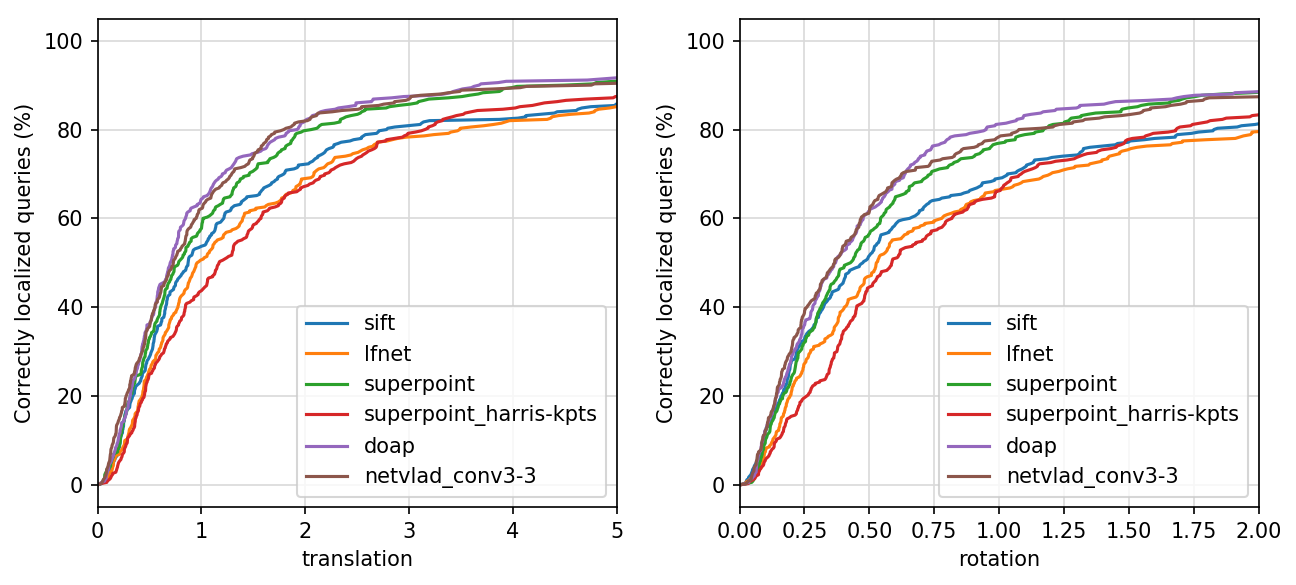

In [9]:
error_names = list(list(pose_recalls.values())[0].keys())
expers = list(pose_recalls.keys())
lim = {'translation': 5, 'rotation': 2}
thresh = {'translation': [0.5, 1, 4], 'rotation': [0.25, 1, 1.5]}

f, axes = plt.subplots(1, len(error_names), figsize=(8, 4), dpi=150)
for error_name, ax in zip(error_names, axes):
    for exper in expers:
        steps, recall = pose_recalls[exper][error_name]
        ax.set_xlim([0, lim[error_name]])
        ax.plot(steps, recall*100, label=exper);
        
        s = f'{error_name:^15} {exper:^25}'
        s += ''.join([f' {t:^5}: {recall[np.where(steps>t)[0].min()]:.2f} ' for t in thresh[error_name]])
        print(s)
        
    ax.grid(color=[0.85]*3);
    ax.set_xlabel(error_name);
    ax.set_ylabel('Correctly localized queries (%)');
    ax.legend(loc=4); 
plt.tight_layout()
plt.gcf().subplots_adjust(left=0);

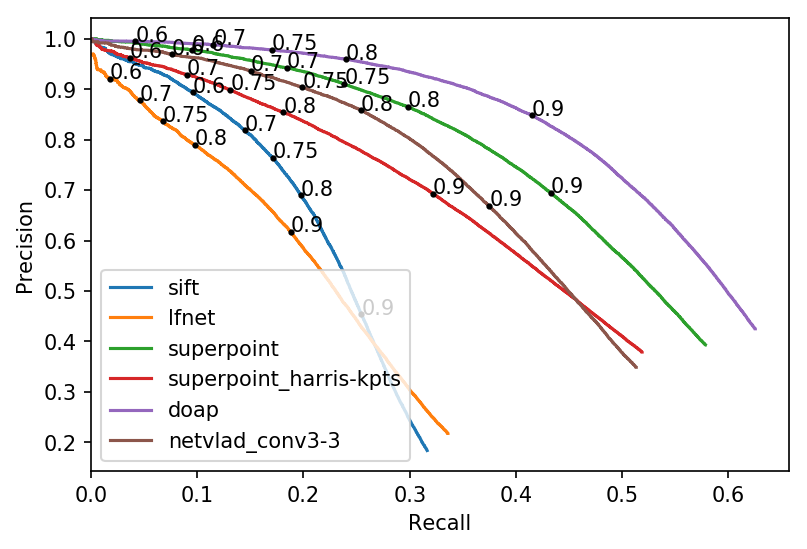

In [10]:
match_thresh = [0.9, 0.8, 0.75, 0.7, 0.6]
plt.figure(dpi=150, figsize=(6, 4));
for exper, (precision, recall, distances) in nn_pr.items():
    plt.plot(recall, precision, label=exper);

    for t in match_thresh:
        op_idx = np.min(np.where(distances > t))
        plt.plot(recall[op_idx], precision[op_idx], marker='o', color='k', markersize=2)
        plt.annotate(str(t), xy=(recall[op_idx], precision[op_idx]))
        
plt.xlim(0, None)
plt.xlabel('Recall'), plt.ylabel('Precision'); plt.legend(loc=3);